# Batch Gradient Descent

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/8_sgd_vs_gd/homeprices_banglore.csv"
house_prices = pd.read_csv(path)
house_prices.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
# Biz bunları 0 ile 1 arasında istiyoruz !!!

print("Area Max : {}".format(house_prices["area"].max()))
print("Area Min : {}".format(house_prices["area"].min()))
print()
print("Bedrooms Max : {}".format(house_prices["bedrooms"].max()))
print("Bedrooms Min : {}".format(house_prices["bedrooms"].min()))
print()
print("Price Max : {}".format(house_prices["price"].max()))
print("Price Min : {}".format(house_prices["price"].min()))

Area Max : 3700
Area Min : 800

Bedrooms Max : 5
Bedrooms Min : 1

Price Max : 167.0
Price Min : 32.0


In [4]:
from sklearn.preprocessing import MinMaxScaler

sx = MinMaxScaler(feature_range = (0,1))
sy = MinMaxScaler(feature_range = (0,1))

X_scaled = sx.fit_transform(house_prices.drop("price",axis = 1))
y_scaled = sy.fit_transform(house_prices[["price"]])

In [5]:
# Biz bunları 0 ile 1 arasında istiyoruz !!!
# İstediğimize ulaştık !!!

print("X_Scaled Max : {}".format(X_scaled.max()))
print("X_Scaled Min : {}".format(X_scaled.min()))
print()
print("y_Scaled Max : {}".format(y_scaled.max()))
print("y_Scaled Min : {}".format(y_scaled.min()))

X_Scaled Max : 1.0
X_Scaled Min : 0.0

y_Scaled Max : 1.0
y_Scaled Min : 0.0


In [6]:
print("X Scaled Shape : {}".format(X_scaled.shape))
print()
print("Y Scaled Shape : {}".format(y_scaled.shape))

X Scaled Shape : (20, 2)

Y Scaled Shape : (20, 1)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(house_prices[["area","bedrooms"]], house_prices["price"], test_size = 0.2, random_state = 25)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [9]:
model = Sequential()

model.add(Dense(1, input_shape = (2,),activation = "relu", kernel_initializer="ones", bias_initializer="zeros" ))

model.compile(optimizer = Adam(learning_rate = 0.01), loss = "mse", metrics = ["mse"])

model.fit(X_scaled, y_scaled, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 460ms/step - loss: 0.2769 - mse: 0.2769
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2576 - mse: 0.2576
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2391 - mse: 0.2391
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2212 - mse: 0.2212
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2042 - mse: 0.2042
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 0.1879 - mse: 0.1879
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1724 - mse: 0.1724
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1576 - mse: 0.1576
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1437 - mse: 0.1437
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1305 - mse: 0.1305
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 0.11

In [10]:
# Bu Yapılan İşlem Linear Regression İçin

def batch_gradient_descent(X, y_true, epochs , learning_rate = 0.5, loss_threshold = 0.5):

    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features,))
    bias = 0
    total_samples = X.shape[0]
    epochs_list = []
    cost_list = []

    for i in range(epochs):

        y_predicted = np.dot(w, X.T) + bias

        # Log Loss için y_predicted - y_true

        w_grad = -(2/total_samples) * np.dot( X_scaled.T, (y_true - y_predicted) )
        #w_grad = -(2/total_samples) * X_scaled.T.dot((y_true - y_predicted))
        b_grad = -(2/total_samples) * np.sum(y_true - y_predicted)


        w = w - learning_rate*w_grad
        bias = bias - learning_rate*b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        cost_list.append(cost)
        epochs_list.append(i)

        if i % 10 == 0 : 

          print(f"Epochs : {i:{5}} , Weights : {str(w):{20}} , Bias : {round(bias,5):{15}}, Cost : {round(cost,4):{10}}")

    return w, bias , cost_list, epochs_list

In [11]:
bgd_w, bgd_bias , bgd_cost_list, bgd_epochs_list = batch_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],), epochs = 501, learning_rate = 0.01)

Epochs :     0 , Weights : [0.99551317 0.99445655] , Bias :         -0.0096, Cost :     0.2769
Epochs :    10 , Weights : [0.95630831 0.94626642] , Bias :        -0.09164, Cost :     0.1657
Epochs :    20 , Weights : [0.92561534 0.90895369] , Bias :        -0.15268, Cost :     0.1021
Epochs :    30 , Weights : [0.9013738  0.87987065] , Bias :        -0.19789, Cost :     0.0656
Epochs :    40 , Weights : [0.88202714 0.8570175 ] , Bias :        -0.23116, Cost :     0.0446
Epochs :    50 , Weights : [0.86639945 0.8388837 ] , Bias :        -0.25543, Cost :     0.0325
Epochs :    60 , Weights : [0.85360224 0.82432823] , Bias :        -0.27293, Cost :     0.0253
Epochs :    70 , Weights : [0.8429641  0.81248913] , Bias :        -0.28531, Cost :     0.0211
Epochs :    80 , Weights : [0.83397757 0.80271516] , Bias :        -0.29386, Cost :     0.0185
Epochs :    90 , Weights : [0.826259   0.79451428] , Bias :        -0.29952, Cost :     0.0168
Epochs :   100 , Weights : [0.81951826 0.78751463]

In [12]:
model.get_weights()

[array([[0.69469637],
        [0.5580317 ]], dtype=float32), array([-0.17194222], dtype=float32)]

In [13]:
bgd_w, bgd_bias

(array([0.706968  , 0.67437818]), -0.2301900410229738)

In [14]:
def cost_graph(epochs_list, cost_list,title = ""):

    plt.figure(figsize = (15,7))
    plt.plot(epochs_list, cost_list)
    size = 15
    plt.title(title, fontsize = size)
    plt.xlabel("Epochs", fontsize = size)
    plt.ylabel("Cost", fontsize = size)
    plt.show()


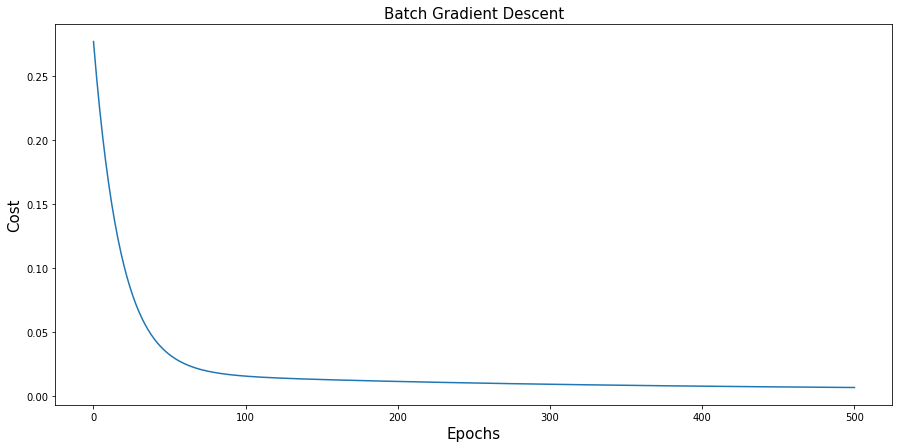

In [15]:
cost_graph(bgd_epochs_list, bgd_cost_list, "Batch Gradient Descent")

In [16]:
# Bu manuel olarak bir yapım

def predict(area,bedroom):

    Scaled_X = sx.transform([[area,bedroom]])[0]

    scaled_price = np.dot(bgd_w,Scaled_X) + bgd_bias

    inverse_price = sy.inverse_transform([[scaled_price]])
    
    return print("Price : {}".format(inverse_price[0][0]))

In [17]:
predict(2600,4)

Price : 128.4441786492114


In [18]:
predict(1500,3)

Price : 69.48227748506835


In [19]:
predict(1000,2)

Price : 30.266724042971813


In [20]:
def price_bgd(X_test):

    scaled_x = sx.transform([X_test])[0]

    scaled_price = np.dot(bgd_w, scaled_x.T) + bgd_bias

    price = sy.inverse_transform([[scaled_price]])[0][0]

    return print("Price : {}".format(price))


In [21]:
# Genel olarak böyle olması birden fazla veriyi okuyabilir !!!

x = np.array([2600,4])
price_bgd(x)

Price : 128.4441786492114


In [22]:
# Biz bunları class yapısında yapalım!!!


class BGD:

    def __init__(self):

        self.w = None
        self.bias = None
        self.epochs_list = []
        self.cost_list = []

    def fit(self, X, y, epochs, learning_rate):

        self.w , self.bias, self.epochs_list, self.cost_list = self.batch_gradient_descent(X,y,epochs,learning_rate)
        
        print()
        print(f"Final Weights : {str(self.w):{15}}, Bias = {self.bias:{15}} , Last Cost : {self.cost_list[-1]:{15}}")

    def predict(self,X_test):
        
        #sy.inverse_transform([np.dot(w,sx.transform(X_test).T) + bias])
        
        Scaled_X = sx.transform(X_test)

        Scaled_Price = np.dot(self.w, Scaled_X.T) + self.bias

        Price = sy.inverse_transform([Scaled_Price])

        #return print("Price : {}".format(Price))

        return Price

    def cost_graph(self,title = ""):

        plt.figure(figsize = (15,7))
        plt.plot(self.epochs_list, self.cost_list)
        size = 15
        plt.title(title, fontsize = size)
        plt.xlabel("Epochs", fontsize = size)
        plt.ylabel("Cost", fontsize = size)
        plt.show()
    
    def batch_gradient_descent(self,X,y,epochs,learning_rate):

        number_of_features = X.shape[1]
        total_samples = X.shape[0]

        w = np.ones(shape = (number_of_features,))
        bias = 0

        epochs_list = []
        cost_list = []

        for i in range(epochs):

            y_predicted = np.dot(w,X.T) + bias 

            # Log İçin (1/n)*X*(y_predicted - y_true)
            w_grad = -(2/total_samples) * X.T.dot(y-y_predicted)
            b_grad = -(2/total_samples) * np.sum(y-y_predicted)

            w = w - learning_rate*w_grad
            bias = bias - learning_rate*b_grad

            cost = np.mean(np.square(y-y_predicted))

            cost_list.append(cost)
            epochs_list.append(i)

            if i %10 ==0:

                print(f"Epochs : {i:{5}} , Weights : {str(w):{20}} , Bias : {round(bias,5):{15}}, Cost : {round(cost,4):{10}}")


        return w, bias, epochs_list, cost_list

In [23]:
customBGD = BGD()
customBGD.fit(X_scaled,y_scaled.reshape(y_scaled.shape[0]),epochs= 501, learning_rate = 0.01)

Epochs :     0 , Weights : [0.99551317 0.99445655] , Bias :         -0.0096, Cost :     0.2769
Epochs :    10 , Weights : [0.95630831 0.94626642] , Bias :        -0.09164, Cost :     0.1657
Epochs :    20 , Weights : [0.92561534 0.90895369] , Bias :        -0.15268, Cost :     0.1021
Epochs :    30 , Weights : [0.9013738  0.87987065] , Bias :        -0.19789, Cost :     0.0656
Epochs :    40 , Weights : [0.88202714 0.8570175 ] , Bias :        -0.23116, Cost :     0.0446
Epochs :    50 , Weights : [0.86639945 0.8388837 ] , Bias :        -0.25543, Cost :     0.0325
Epochs :    60 , Weights : [0.85360224 0.82432823] , Bias :        -0.27293, Cost :     0.0253
Epochs :    70 , Weights : [0.8429641  0.81248913] , Bias :        -0.28531, Cost :     0.0211
Epochs :    80 , Weights : [0.83397757 0.80271516] , Bias :        -0.29386, Cost :     0.0185
Epochs :    90 , Weights : [0.826259   0.79451428] , Bias :        -0.29952, Cost :     0.0168
Epochs :   100 , Weights : [0.81951826 0.78751463]

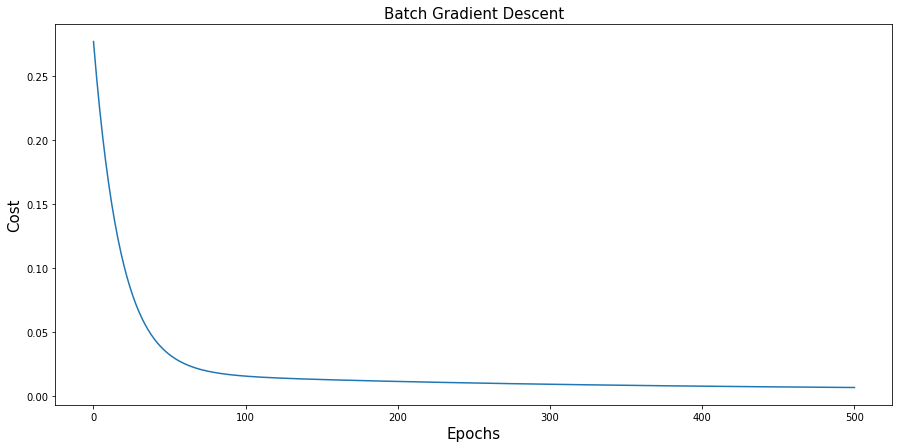

In [24]:
customBGD.cost_graph(title = "Batch Gradient Descent")

In [25]:
# Class Yapısı ile !!!

test = np.array([[2600,4]])

customBGD.predict(test)

array([[128.44417865]])

In [26]:
customBGD.predict(X_test)

array([[ 33.557782  , 134.53263586,  67.50764271,  79.35545135]])

In [27]:
# Class yapısı olmadan !!!

predict(2600,4)

Price : 128.4441786492114


# Stochastic Gradient Descent

In [28]:
import random 

# 0 ile 6 da dahil bunun görülmesini istedim !!!!

i = 0
while i< 10:
    print(random.randint(0,6))
    i+=1

1
4
6
6
1
3
4
2
4
3


In [29]:
def stochastic_gradient_descent(X,y, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    total_samples = X.shape[0]

    w = np.ones(shape = (number_of_features,))
    bias = 0

    epochs_list = []
    cost_list = []

    for i in range(epochs):
        
        # Bizim normal data uzunluğu normalde 20 biz gidip burdan X_scaled[20] desek hata çıkar 0 ile total_samples-1(20-1) yapmalıyız!!!!
        random_index = random.randint(0,total_samples - 1)

        sample_X = X[random_index]
        sample_y = y[random_index]

        y_predicted = np.dot(w,sample_X.T) + bias

        w_grad = -(2/total_samples) * sample_X.T.dot(sample_y - y_predicted) 
        b_grad = -(2/total_samples) * np.sum(sample_y - y_predicted)

        w = w - learning_rate*w_grad
        bias = bias - learning_rate*b_grad

        # Cost dikkat zaten bir değer alıyor unutma !!!

        cost = (np.square(sample_y - y_predicted))

        if i % 100 == 0:

            epochs_list.append(i)
            cost_list.append(cost)

            print(f"Epochs : {i:{5}} , Weights : {str(w):{20}} , Bias : {round(bias,5):{15}}, Cost : {round(cost,4):{10}}")

    return w, bias, epochs_list, cost_list

In [30]:
sgd_w, sgd_bias, sgd_epochs_list , sgd_cost_list = stochastic_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],), epochs = 10001, learning_rate = 0.01)

Epochs :     0 , Weights : [0.99975556 0.99975556] , Bias :        -0.00049, Cost :      0.239
Epochs :   100 , Weights : [0.9794051  0.97491333] , Bias :        -0.04353, Cost :      0.079
Epochs :   200 , Weights : [0.96343046 0.95352437] , Bias :        -0.08267, Cost :     0.0996
Epochs :   300 , Weights : [0.94409095 0.93102214] , Bias :        -0.11718, Cost :     0.0368
Epochs :   400 , Weights : [0.92759937 0.91183812] , Bias :        -0.14715, Cost :     0.1773
Epochs :   500 , Weights : [0.91514388 0.89639596] , Bias :        -0.17204, Cost :     0.0491
Epochs :   600 , Weights : [0.90304012 0.88144882] , Bias :        -0.19436, Cost :     0.0029
Epochs :   700 , Weights : [0.89273626 0.86962487] , Bias :        -0.21139, Cost :      0.026
Epochs :   800 , Weights : [0.88279891 0.85866322] , Bias :        -0.22658, Cost :     0.0514
Epochs :   900 , Weights : [0.87460951 0.84930617] , Bias :        -0.23886, Cost :        0.0
Epochs :  1000 , Weights : [0.86724325 0.84048959]

In [31]:
sgd_w, sgd_bias

(array([0.70564795, 0.67112602]), -0.22817234749206522)

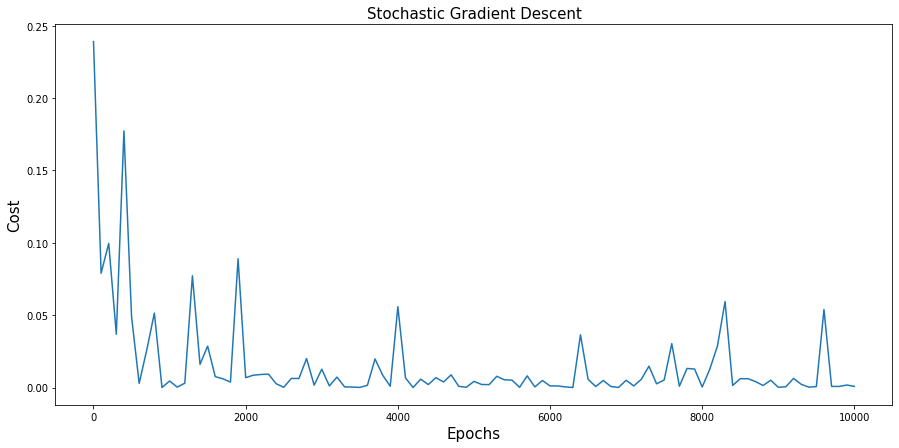

In [32]:
cost_graph(sgd_epochs_list, sgd_cost_list, title = "Stochastic Gradient Descent")

In [33]:
def price_sgd(X_test):

    scaled_x = sx.transform([X_test])[0]
    
    scaled_price = np.dot(sgd_w, scaled_x) + sgd_bias

    price = sy.inverse_transform([[scaled_price]])[0][0]
    
    return print("Price : {}".format(price))

In [34]:
test = np.array([1500,3])
price_sgd(test)

Price : 69.49212959941259


In [35]:
# Stochastic Gradient Descent Class

class SGD:

    def __init__(self):

        self.w = None
        self.bias = None
        self.epochs_list = []
        self.cost_list = []

    def fit(self, X ,y , epochs , learning_rate):

        self.w, self.bias, self.epochs_list, self.cost_list = self.stochastic_gradient_descent(X, y, epochs, learning_rate)

        print()
        print(f"Final Weights : {str(self.w):{15}}, Bias = {self.bias:{15}} , Last Cost : {self.cost_list[-1]:{15}}")


    def predict(self, X_test):

        scaled_x = sx.transform(X_test)

        scaled_price = np.dot(self.w, scaled_x.T) + self.bias

        price = sy.inverse_transform([scaled_price])

        return price

    def cost_graph(self, title = ""):
        
        plt.figure(figsize = (15,7))
        plt.plot(self.epochs_list, self.cost_list)
        size = 15
        plt.title(title, fontsize = size)
        plt.xlabel("Epochs", fontsize = size)
        plt.ylabel("Cost", fontsize = size)
        plt.show()

    def stochastic_gradient_descent(self,X, y, epochs, learning_rate):

        epochs_list = []
        cost_list = []

        number_of_features = X.shape[1]
        total_samples = X.shape[0]

        w = np.ones(shape = (number_of_features,))
        bias = 0

        for i in range(epochs):

            random_index = random.randint(0, total_samples-1)

            sample_X = X[random_index]
            sample_y = y[random_index]

            y_predicted = np.dot(w,sample_X.T) + bias

            w_grad = -(2/total_samples) * sample_X.T.dot(sample_y-y_predicted)
            b_grad = -(2/total_samples) * np.sum(sample_y - y_predicted)

            w = w - learning_rate*w_grad
            bias = bias - learning_rate*b_grad

            cost = np.square(sample_y-y_predicted)
            
          

            if i % 100 == 0:
                
                epochs_list.append(i)
                cost_list.append(cost)

                print(f"Epochs : {i:{5}} , Weights : {str(w):{20}} , Bias : {round(bias,5):{15}}, Cost : {round(cost,4):{10}}")

        return w, bias, epochs_list, cost_list

In [36]:
customSGD = SGD()
customSGD.fit(X_scaled, y_scaled.reshape(y_scaled.shape[0],) , epochs = 10000, learning_rate = 0.01)

Epochs :     0 , Weights : [0.99997476 0.99992852] , Bias :        -0.00029, Cost :     0.0817
Epochs :   100 , Weights : [0.97823585 0.97298681] , Bias :        -0.04649, Cost :     0.1753
Epochs :   200 , Weights : [0.95972735 0.95017818] , Bias :        -0.08328, Cost :     0.0069
Epochs :   300 , Weights : [0.94566002 0.93185737] , Bias :        -0.11605, Cost :     0.2693
Epochs :   400 , Weights : [0.93128783 0.91394146] , Bias :        -0.14549, Cost :     0.0128
Epochs :   500 , Weights : [0.91742291 0.89697842] , Bias :        -0.17155, Cost :     0.1088
Epochs :   600 , Weights : [0.90802033 0.88515989] , Bias :        -0.19191, Cost :     0.0023
Epochs :   700 , Weights : [0.89709056 0.8722668 ] , Bias :         -0.2111, Cost :     0.0011
Epochs :   800 , Weights : [0.88634809 0.86001351] , Bias :        -0.22678, Cost :     0.0606
Epochs :   900 , Weights : [0.87973547 0.85220158] , Bias :         -0.2366, Cost :     0.0724
Epochs :  1000 , Weights : [0.87118506 0.84241373]

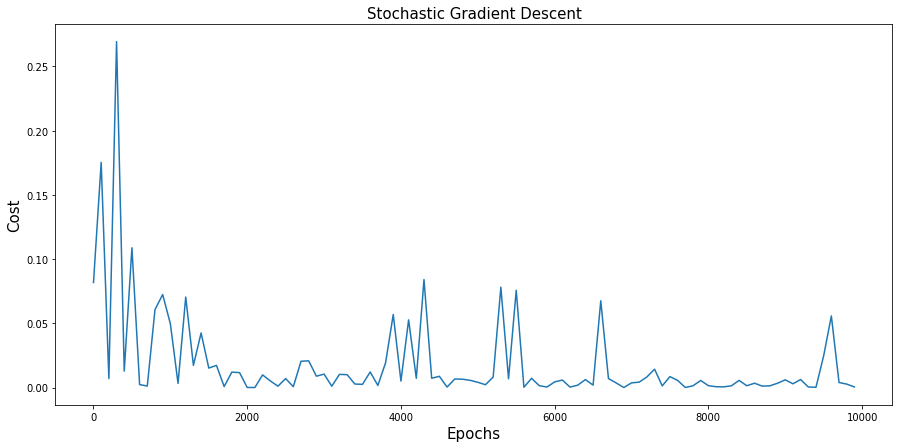

In [37]:
customSGD.cost_graph(title = "Stochastic Gradient Descent")

In [38]:
customSGD.predict(X_test)

array([[ 33.47379783, 134.70979995,  67.48614769,  79.38273362]])

In [39]:
x = np.array([[2600,4]])

customSGD.predict(x)

array([[128.59627663]])

In [40]:
customBGD.predict(x)

array([[128.44417865]])

# Mini Batch Gradient Descent

In [41]:
np.random.permutation(X_scaled.shape[0])

array([ 7,  5, 15,  1,  2,  3,  8, 17, 12, 14, 19,  9,  6,  4, 18,  0, 11,
       10, 13, 16])

In [42]:
def mini_batch_gradient_descent(X, y, epochs = 100 , learning_rate =  0.01, batch_size = 5 ):

    number_of_features = X.shape[1]
    total_samples = X.shape[0]

    w = np.ones(shape = (number_of_features,))
    bias = 0

    epochs_list = []
    cost_list = []

    if batch_size > total_samples :

        bath_size = total_samples

    for i in range(epochs):

        # Bir dataları dağıtalım
        random_indexes = np.random.permutation(total_samples)

        X_tmp = X[random_indexes]
        y_tmp = y[random_indexes]

        # range(0, 20, 5) ---> 0, 5, 10 , 15 çıkar
        # Üstüne batch_size kadar ekler sonra !!!

        for j in range(0,total_samples,batch_size):

            X_select = X_tmp[j : j + batch_size]
            y_select = y_tmp[j : j + batch_size]

            y_predicted = np.dot(w, X_select.T) + bias

            # Buraya dikkat !!!!
            w_grad = -(2/len(X_select)) * (X_select.T.dot(y_select - y_predicted))
            b_grad = -(2/len(X_select)) * (np.sum(y_select - y_predicted))

            w    = w    - learning_rate * w_grad
            bias = bias - learning_rate * b_grad

            cost = np.mean(np.square(y_select - y_predicted))


        if i % 10 == 0:

            cost_list.append(cost)
            epochs_list.append(i)

            print(f"Epochs : {i:{5}} , Weights : {str(w):{20}} , Bias : {round(bias,5):{15}}, Cost : {round(cost,4):{10}}")

    return w, bias, epochs_list, cost_list

In [43]:
mbgd_w, mbgd_bias, mbgd_epochs_list, mbgd_cost_list = mini_batch_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0], ), epochs = 501, batch_size = 5, learning_rate = 0.01)

Epochs :     0 , Weights : [0.98264708 0.97864192] , Bias :        -0.03663, Cost :     0.1477
Epochs :    10 , Weights : [0.87693786 0.85098148] , Bias :        -0.23947, Cost :     0.0365
Epochs :    20 , Weights : [0.83146303 0.79990446] , Bias :        -0.29601, Cost :      0.028
Epochs :    30 , Weights : [0.80656154 0.77439644] , Bias :        -0.30559, Cost :     0.0049
Epochs :    40 , Weights : [0.78921474 0.75776137] , Bias :        -0.30058, Cost :     0.0217
Epochs :    50 , Weights : [0.77502381 0.74441226] , Bias :        -0.29162, Cost :     0.0237
Epochs :    60 , Weights : [0.76267526 0.73271194] , Bias :        -0.28176, Cost :     0.0031
Epochs :    70 , Weights : [0.75155007 0.72192693] , Bias :        -0.27222, Cost :     0.0051
Epochs :    80 , Weights : [0.74141076 0.71182578] , Bias :        -0.26328, Cost :      0.011
Epochs :    90 , Weights : [0.73218441 0.70231718] , Bias :          -0.255, Cost :     0.0094
Epochs :   100 , Weights : [0.72387273 0.69347326]

In [44]:
mbgd_w, mbgd_bias,mbgd_cost_list[-1]

(array([0.67130031, 0.53331729]), -0.14361613926994757, 0.003927568094507171)

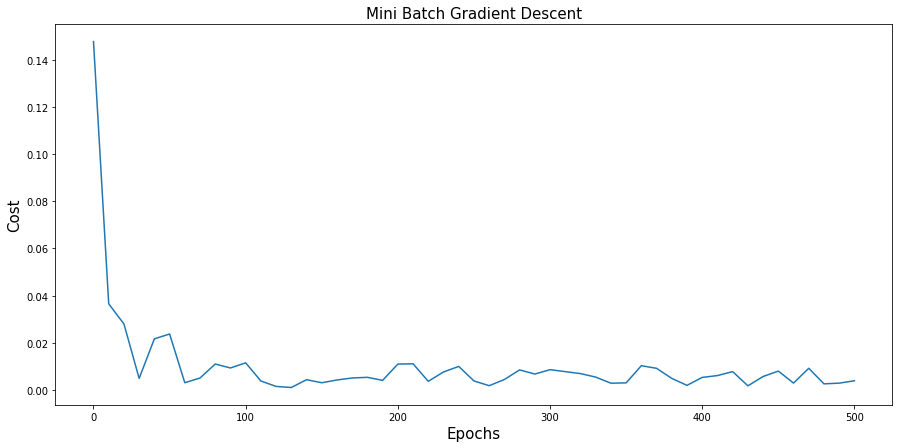

In [45]:
cost_graph(mbgd_epochs_list, mbgd_cost_list, title = "Mini Batch Gradient Descent")

In [46]:
def price_mbgd(X_test):

    scaled_x = sx.transform([X_test])[0]

    scaled_price = np.dot(mbgd_w, scaled_x.T) + mbgd_bias

    price = sy.inverse_transform([[scaled_price]])[0][0]

    return print("Price : {}".format(price))

In [47]:
class MBGD:

    def __init__(self):

        self.w = None
        self.bias = None
        self.epochs_list = []
        self.cost_list = []

    
    def fit(self, X, y, epochs,batch_size , learning_rate):

        self.w, self.bias, self.epochs_list, self.cost_list = self.mini_batch_gradient_descent(X, y, epochs, batch_size, learning_rate)

        print()
        print(f"Final Weights : {str(self.w):{15}}, Bias = {self.bias:{15}} , Last Cost : {self.cost_list[-1]:{15}}")

    def predict(self, X_test):

        scaled_X = sx.transform(X_test) 

        scaled_price = np.dot(self.w, scaled_X.T) + self.bias

        price = sy.inverse_transform([scaled_price])

        return price

    def cost_graph(self, title = ""):

        plt.figure(figsize = (15,7))
        plt.plot(self.epochs_list, self.cost_list)
        size = 15
        plt.title(title, fontsize = size)
        plt.xlabel("Epochs", fontsize = size)
        plt.ylabel("Cost", fontsize = size)
        plt.show()
        

    def mini_batch_gradient_descent(self, X, y, epochs,batch_size, learning_rate):

        number_of_features = X.shape[1]
        total_samples = X.shape[0]
        epochs_list =[]
        cost_list = []

        w = np.ones(shape = (number_of_features,))
        bias = 0

        if batch_size > total_samples :
            batch_size = total_samples


        for i in range(epochs):

            # Verileri karıştıralım

            random_indexes = np.random.permutation(total_samples)

            X_tmp = X[random_indexes]
            y_tmp = y[random_indexes]

            for j in range(0 ,total_samples, batch_size):

                X_select = X_tmp[j : j + batch_size]
                y_select = y_tmp[j : j + batch_size]

                y_predicted = np.dot(w, X_select.T) + bias

                w_grad = -(2/len(X_select)) * X_select.T.dot(y_select-y_predicted)
                b_grad = -(2/len(X_select)) * np.sum(y_select - y_predicted)

                w = w - learning_rate * w_grad
                bias = bias - learning_rate * b_grad

                cost = np.mean(np.square(y_select-y_predicted))

            
            if i % 10 == 0:

                cost_list.append(cost)
                epochs_list.append(i)

                print(f"Epochs : {i:{5}} , Weights : {str(w):{20}} , Bias : {round(bias,5):{15}}, Cost : {round(cost,4):{10}}")
        
        return w, bias , epochs_list, cost_list

In [48]:
customMBGD = MBGD()
customMBGD.fit(X_scaled, y_scaled.reshape(y_scaled.shape[0], ) , epochs = 501 , batch_size = 5, learning_rate = 0.01 )

Epochs :     0 , Weights : [0.98266251 0.97860123] , Bias :        -0.03689, Cost :     0.3928
Epochs :    10 , Weights : [0.87687428 0.85094445] , Bias :        -0.23961, Cost :     0.0292
Epochs :    20 , Weights : [0.83146049 0.79995579] , Bias :        -0.29601, Cost :     0.0095
Epochs :    30 , Weights : [0.80655665 0.77447265] , Bias :        -0.30553, Cost :     0.0062
Epochs :    40 , Weights : [0.78916965 0.75780202] , Bias :        -0.30054, Cost :     0.0038
Epochs :    50 , Weights : [0.77502942 0.74451282] , Bias :        -0.29147, Cost :     0.0075
Epochs :    60 , Weights : [0.76257683 0.7326786 ] , Bias :        -0.28186, Cost :     0.0123
Epochs :    70 , Weights : [0.75147682 0.72192424] , Bias :        -0.27225, Cost :     0.0024
Epochs :    80 , Weights : [0.74139359 0.71185722] , Bias :        -0.26327, Cost :     0.0037
Epochs :    90 , Weights : [0.73215705 0.70234232] , Bias :        -0.25498, Cost :      0.004
Epochs :   100 , Weights : [0.72392274 0.69358738]

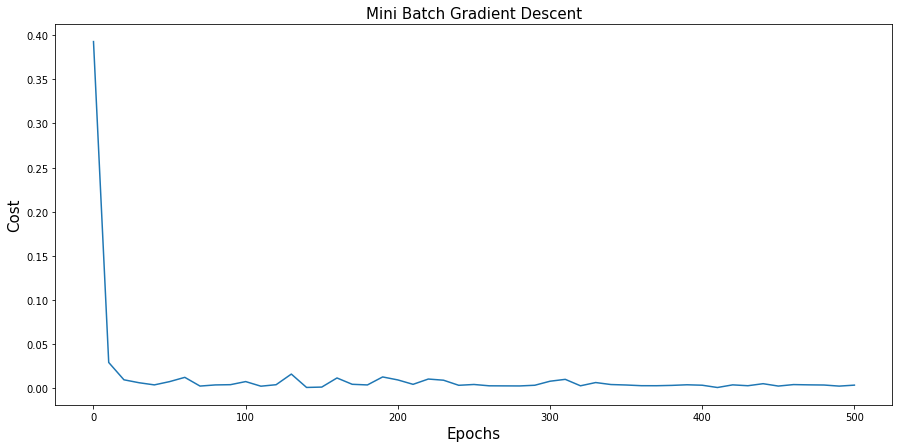

In [49]:
customMBGD.cost_graph(title = "Mini Batch Gradient Descent")

In [50]:
customMBGD.predict(X_test)

array([[ 39.98889699, 128.64962722,  68.61573166,  79.86602213]])

In [51]:
customBGD.predict(X_test)

array([[ 33.557782  , 134.53263586,  67.50764271,  79.35545135]])

In [52]:
customSGD.predict(X_test)

array([[ 33.47379783, 134.70979995,  67.48614769,  79.38273362]])

In [53]:
x=np.array([1500,3])

In [54]:
price_mbgd(x)

Price : 70.48586860710776


In [55]:
price_sgd(x)

Price : 69.49212959941259


In [56]:
price_bgd(x)

Price : 69.48227748506835


In [57]:
# Burda Şöyle bir durum var veri setimiz küçük ve biz kendimiz burda Gradient Descent Methodlarını öğrenmeye çalıştık..
# Sonuçlar yine bir birlerine yakın
# Hepsini burda görmüş olduk !!!!
# Sonuçlara değil işlemlere odaklanalım !!

data = pd.DataFrame()

data["Actual"] = y_test
data["Tensorflow"] = sy.inverse_transform(model.predict(sx.transform(X_test))).reshape(X_test.shape[0],)
data["MBGD"] = customMBGD.predict(X_test).reshape(X_test.shape[0],)
data["SGD"] = customSGD.predict(X_test).reshape(X_test.shape[0],)
data["BGD"] = customBGD.predict(X_test).reshape(X_test.shape[0],)

data

,Actual,Tensorflow,MBGD,SGD,BGD
13,40.0,37.323166,39.988897,33.473798,33.557782
11,140.0,129.482040,128.649627,134.709800,134.532636
2,62.0,67.152100,68.615732,67.486148,67.507643
10,82.0,78.794250,79.866022,79.382734,79.355451


13     40.0
11    140.0
2      62.0
10     82.0
Name: price, dtype: float64